In [7]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("Desktop\\uber.csv")

In [18]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [19]:
df.columns #TO get number of columns in the dataset

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [20]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1)

In [21]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [22]:
df.shape

(200000, 7)

In [23]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [25]:
df.describe() 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [26]:
df.isnull().sum()


fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [28]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

df.isnull().sum()


fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [29]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

fare_amount             AxesSubplot(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     AxesSubplot(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         AxesSubplot(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    AxesSubplot(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        AxesSubplot(0.125,0.560732;0.352273x0.0939024)
passenger_count      AxesSubplot(0.547727,0.560732;0.352273x0.0939024)
dtype: object

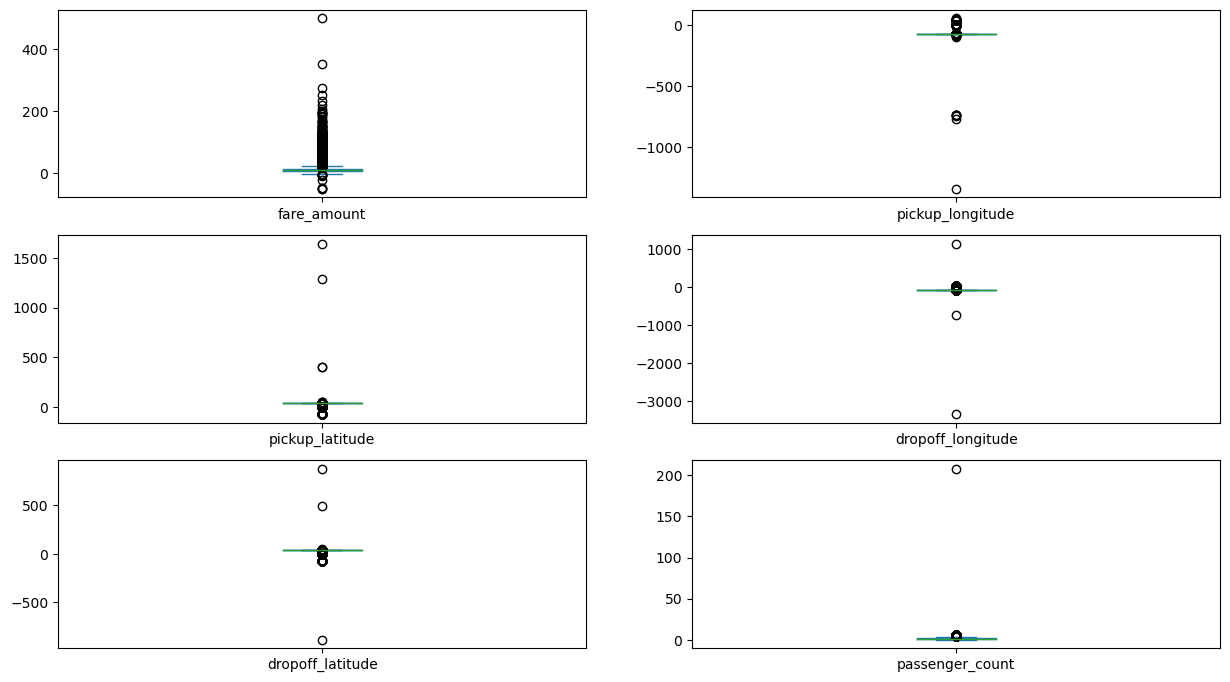

In [30]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 

In [38]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
   Q1=df1[col].quantile(0.25)
   Q3=df1[col].quantile(0.75)
   IQR = Q3 - Q1
   lower_whisker = Q1-1.5*IQR
   upper_whisker = Q3+1.5*IQR
   df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
   return df1
def treat_outliers_all(df1 , col_list):
   for c in col_list:
      df1 = remove_outlier(df , c)
   return df1


In [40]:
df = treat_outliers_all(df , df.iloc[: , 0::])



TypeError: unsupported operand type(s) for -: 'str' and 'str'

fare_amount             AxesSubplot(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     AxesSubplot(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         AxesSubplot(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    AxesSubplot(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        AxesSubplot(0.125,0.560732;0.352273x0.0939024)
passenger_count      AxesSubplot(0.547727,0.560732;0.352273x0.0939024)
dtype: object

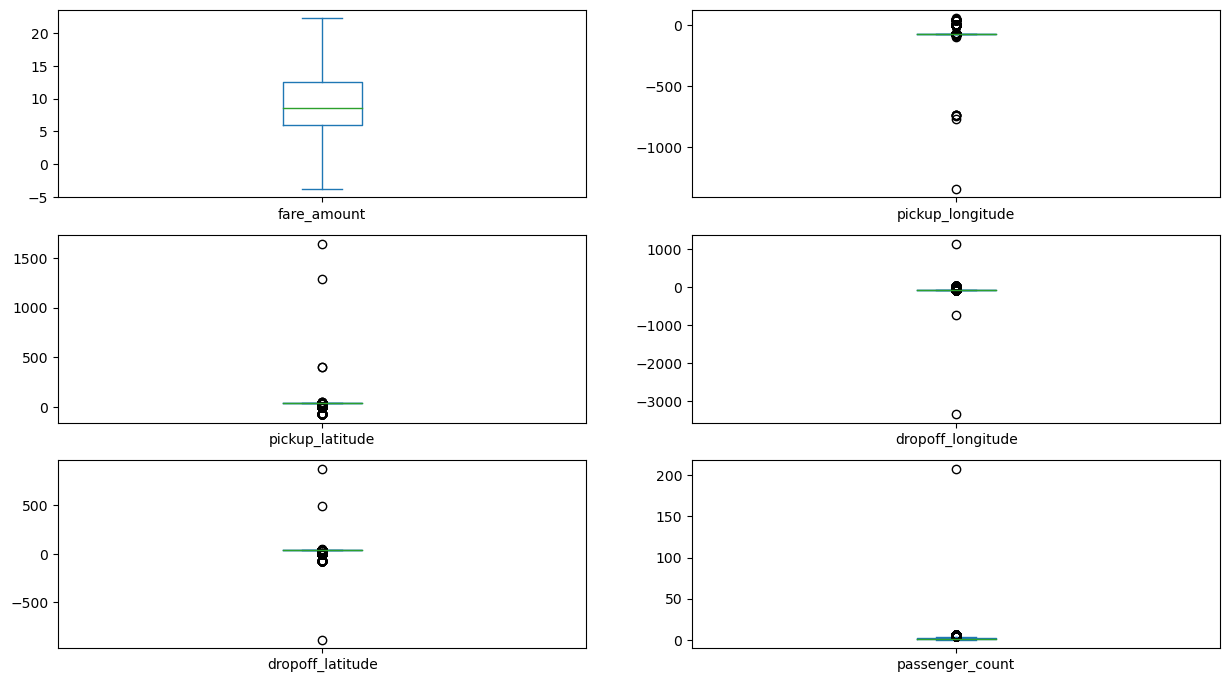

In [41]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 

In [46]:
!pip install haversine


Defaulting to user installation because normal site-packages is not writeable


In [50]:
import haversine as hs #Calculate the distance using Haversine to calculate the distance
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
     long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],
     loc1=(lati1,long1)
     loc2=(lati2,long2)
     c = hs.haversine(loc1,loc2)
     travel_dist.append(c)
                                
print(travel_dist)
df['dist_travel_km'] = travel_dist
df.head()


SyntaxError: invalid syntax (38633236.py, line 5)